<div style="background-color: #611491; border-radius: 20px; color: #fff; font-weight: bold; padding: 10px; text-align:center">
    <h1>Construcción de dashboard analítico completo para análisis de e-commerce</h1>
</div>

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Cargar librerías y configurar Matplotlib</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

from IPython.display import HTML
from pathlib import Path

# configurar directorio para guardar las imágenes generadas
actual_dir = Path.cwd()
ruta_outputs = actual_dir.parent / "outputs" / "outputs_dia_3"

ruta_outputs.mkdir(parents=True, exist_ok=True)
print(f"Carpeta creada")

# Configuración profesional de Matplotlib
plt.style.use('seaborn-v0_8')
mpl.rcParams.update({
    'font.size': 10,
    'figure.figsize': (16, 10),
    'savefig.dpi': 300,
    'savefig.bbox': 'tight'
})

# Paleta de colores
colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

print("Configuración de Matplotlib completada")

Carpeta creada
Configuración de Matplotlib completada


In [2]:
# Código para visualizar la paleta con distintos grados de transparencia

def visualizar_paleta(colores, nombre_de_paleta, size=50):
    '''Ayuda a visualizar la paleta de colores'''
    
    html = '''<div style="display: flex; gap: 15px; align-items: center;">
              <div style="display: flex;">'''
    
    for i, color in enumerate(colores):
        html += f'''
        <div style="background-color: {color}; 
                    height: {size}px; 
                    width: {size}px;">
        </div>
        '''
    
    html += f'''</div>
                <span style="font-weight: bold;">{nombre_de_paleta}</span>
                </div>'''
    return HTML(html)


def visualizar_paletas_para_diferentes_alphas(paleta_colores, lista_alphas, size):
    
    for alpha in lista_alphas:
        # Convertir un valor flotante de transparencia (0.0 a 1.0) a su representación hexadecimal
        alpha_a_hex = lambda alpha_float: f"{round(alpha * 255):02X}"
        alpha_hex = alpha_a_hex(alpha)
        colores_con_alpha = [mpl.colors.to_hex(color) + alpha_hex for color in paleta_colores]
        
        display(visualizar_paleta(colores_con_alpha, f'PALETA CORPORATIVA CON ALPHA = {alpha}', size=size))


visualizar_paletas_para_diferentes_alphas(colores, lista_alphas=[1.0, 0.8, 0.7, 0.2, 0.1], size=35)

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Generar dataset de e-commerce avanzado</h2>
</div>

In [3]:
np.random.seed(42)
n_ordenes = 2000

df = pd.DataFrame({
    'fecha': pd.date_range('2024-01-01', periods=n_ordenes, freq='h'),
    'cliente_id': np.random.randint(1, 401, n_ordenes),
    'categoria': np.random.choice(['Electrónica', 'Ropa', 'Hogar', 'Libros', 'Deportes'], n_ordenes),
    'subtotal': np.round(np.random.lognormal(4.5, 0.8, n_ordenes), 2),
    'descuento': np.round(np.random.uniform(0, 0.3, n_ordenes), 2),
    'envio': np.round(np.random.uniform(5, 25, n_ordenes), 2),
    'region': np.random.choice(['Madrid', 'Barcelona', 'Valencia', 'Sevilla'], n_ordenes),
    'metodo_pago': np.random.choice(['Tarjeta', 'PayPal', 'Transferencia'], n_ordenes, p=[0.7, 0.2, 0.1])
})

# Calcular métricas
df['total'] = df['subtotal'] * (1 - df['descuento']) + df['envio']
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.day_name()

print(f"Dataset de e-commerce creado: {len(df)} órdenes")
print(f"Período: {df['fecha'].min()} a {df['fecha'].max()}")

Dataset de e-commerce creado: 2000 órdenes
Período: 2024-01-01 00:00:00 a 2024-03-24 07:00:00


<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Creación de dashboard comprehensivo con subplots</h2>
</div>


Dashboard comprehensivo guardado como 'dashboard_ecommerce_completo.png'


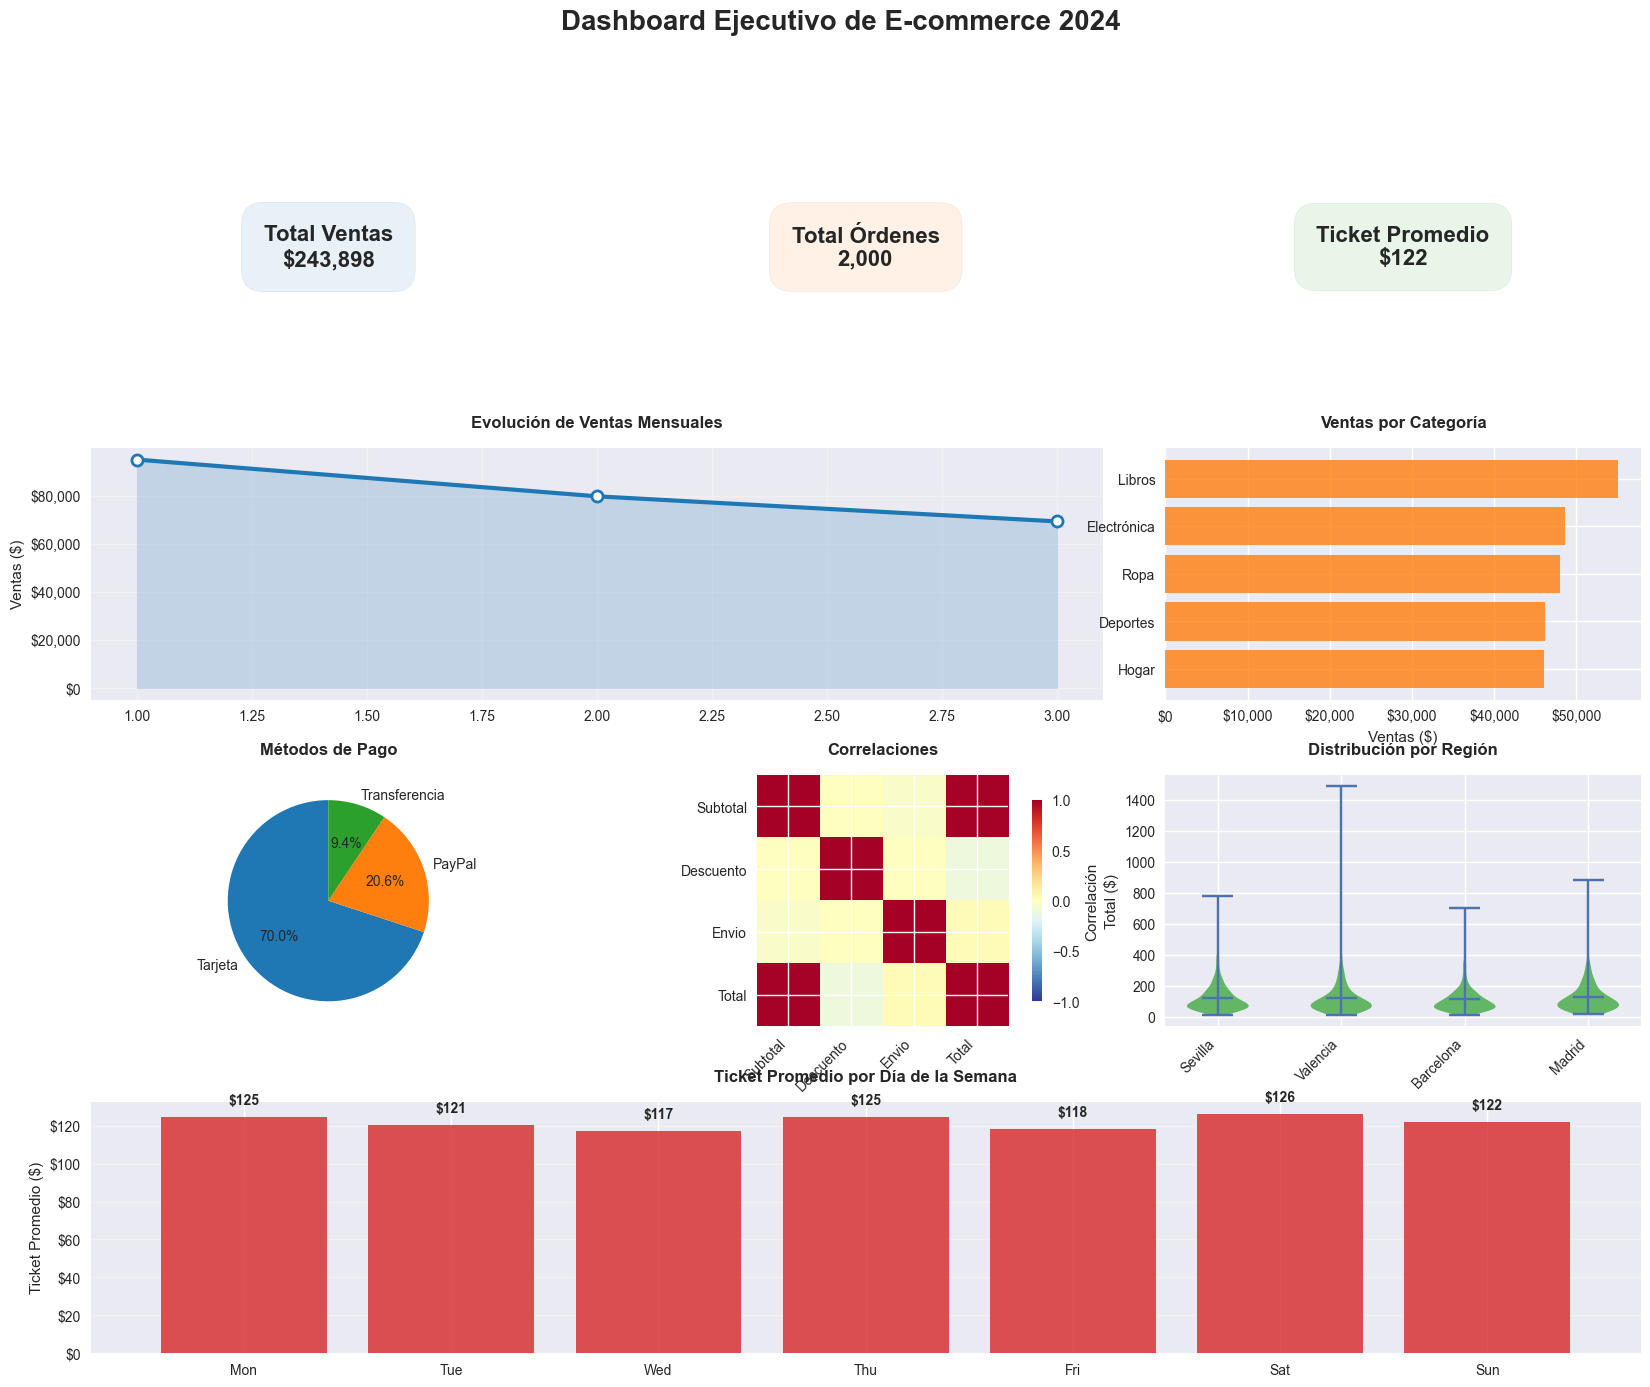

In [4]:
# Crear dashboard con GridSpec para layout flexible
fig = plt.figure(figsize=(20, 16))
gs = GridSpec(4, 6, figure=fig, hspace=0.3, wspace=0.3)

# Título principal
fig.suptitle('Dashboard Ejecutivo de E-commerce 2024', fontsize=20, fontweight='bold', y=0.95)

# 1. KPIs principales (superior)
ax_kpi1 = fig.add_subplot(gs[0, :2])
ax_kpi2 = fig.add_subplot(gs[0, 2:4])
ax_kpi3 = fig.add_subplot(gs[0, 4:])

# KPI 1: Total de ventas
total_ventas = df['total'].sum()
ax_kpi1.text(0.5, 0.5, f'Total Ventas\n${total_ventas:,.0f}', 
             ha='center', va='center', fontsize=16, fontweight='bold',
             bbox=dict(boxstyle='round,pad=1', facecolor=colores[0], alpha=0.1))
ax_kpi1.set_xlim(0, 1)
ax_kpi1.set_ylim(0, 1)
ax_kpi1.axis('off')

# KPI 2: Número de órdenes
num_ordenes = len(df)
ax_kpi2.text(0.5, 0.5, f'Total Órdenes\n{num_ordenes:,}', 
             ha='center', va='center', fontsize=16, fontweight='bold',
             bbox=dict(boxstyle='round,pad=1', facecolor=colores[1], alpha=0.1))
ax_kpi2.axis('off')

# KPI 3: Ticket promedio
ticket_promedio = df['total'].mean()
ax_kpi3.text(0.5, 0.5, f'Ticket Promedio\n${ticket_promedio:.0f}', 
             ha='center', va='center', fontsize=16, fontweight='bold',
             bbox=dict(boxstyle='round,pad=1', facecolor=colores[2], alpha=0.1))
ax_kpi3.axis('off')

# 2. Tendencia mensual (fila 1, columnas 0-3)
ax_trend = fig.add_subplot(gs[1, :4])
ventas_mes = df.groupby('mes')['total'].sum()
ax_trend.plot(ventas_mes.index, ventas_mes.values, 'o-', linewidth=3, 
              color=colores[0], markersize=8, markerfacecolor='white', markeredgewidth=2)
ax_trend.fill_between(ventas_mes.index, ventas_mes.values, alpha=0.2, color=colores[0])
ax_trend.set_title('Evolución de Ventas Mensuales', fontweight='bold', pad=15)
ax_trend.set_ylabel('Ventas ($)')
ax_trend.grid(True, alpha=0.3)
ax_trend.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

# 3. Distribución por categoría (fila 1, columnas 4-5)
ax_categoria = fig.add_subplot(gs[1, 4:])
ventas_cat = df.groupby('categoria')['total'].sum().sort_values(ascending=True)
bars = ax_categoria.barh(ventas_cat.index, ventas_cat.values, color=colores[1], alpha=0.8)
ax_categoria.set_title('Ventas por Categoría', fontweight='bold', pad=15)
ax_categoria.set_xlabel('Ventas ($)')
ax_categoria.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

# 4. Análisis de métodos de pago (fila 2, izquierda)
ax_pago = fig.add_subplot(gs[2, :2])
pago_counts = df['metodo_pago'].value_counts()
wedges, texts, autotexts = ax_pago.pie(pago_counts.values, labels=pago_counts.index, 
                                      autopct='%1.1f%%', colors=colores[:3], startangle=90)
ax_pago.set_title('Métodos de Pago', fontweight='bold', pad=15)

# 5. Heatmap de correlaciones (fila 2, centro)
ax_corr = fig.add_subplot(gs[2, 2:4])
numeric_cols = ['subtotal', 'descuento', 'envio', 'total']
corr_matrix = df[numeric_cols].corr()
im = ax_corr.imshow(corr_matrix, cmap='RdYlBu_r', vmin=-1, vmax=1)
ax_corr.set_xticks(np.arange(len(numeric_cols)))
ax_corr.set_yticks(np.arange(len(numeric_cols)))
ax_corr.set_xticklabels([col.title() for col in numeric_cols], rotation=45, ha='right')
ax_corr.set_yticklabels([col.title() for col in numeric_cols])
ax_corr.set_title('Correlaciones', fontweight='bold', pad=15)

# Barra de color para heatmap
cbar = fig.colorbar(im, ax=ax_corr, shrink=0.8)
cbar.set_label('Correlación')

# 6. Violin plot por región (fila 2, derecha)
ax_region = fig.add_subplot(gs[2, 4:])
region_data = [df[df['region'] == region]['total'] for region in df['region'].unique()]
vp = ax_region.violinplot(region_data, showmeans=True)
for pc in vp['bodies']:
    pc.set_facecolor(colores[2])
    pc.set_alpha(0.7)
ax_region.set_xticks(range(1, len(df['region'].unique()) + 1))
ax_region.set_xticklabels(df['region'].unique(), rotation=45, ha='right')
ax_region.set_title('Distribución por Región', fontweight='bold', pad=15)
ax_region.set_ylabel('Total ($)')

# 7. Análisis de días de la semana (fila 3, completa)
ax_dia = fig.add_subplot(gs[3, :])
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ventas_dia = df.groupby('dia_semana')['total'].mean().reindex(orden_dias)
bars_dia = ax_dia.bar(range(len(ventas_dia)), ventas_dia.values, color=colores[3], alpha=0.8)
ax_dia.set_xticks(range(len(ventas_dia)))
ax_dia.set_xticklabels([dia[:3] for dia in orden_dias])
ax_dia.set_title('Ticket Promedio por Día de la Semana', fontweight='bold', pad=15)
ax_dia.set_ylabel('Ticket Promedio ($)')
ax_dia.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax_dia.grid(True, alpha=0.3, axis='y')

# Añadir valores encima de las barras
for bar, valor in zip(bars_dia, ventas_dia.values):
    height = bar.get_height()
    ax_dia.text(bar.get_x() + bar.get_width()/2., height + 5, 
               f'${valor:.0f}', ha='center', va='bottom', fontweight='bold')

plt.savefig(ruta_outputs / 'dashboard_ecommerce_completo.png', dpi=300, bbox_inches='tight')
print("\nDashboard comprehensivo guardado como 'dashboard_ecommerce_completo.png'")

<div style="font-weight: bold; color:#611491 ; border-width: 0 0 3px 0; border-style: solid; border-color: #611491; padding: 3px; ">
    <h2>Análisis</h2>
</div>

Examina el dashboard generado e identifica cómo cada visualización contribuye a una comprensión integral del negocio: ¿Qué patrones emergen en las ventas? ¿Qué insights clave comunicarías a la dirección?

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">1. KPIs Claves</h3>
</div>

- Los tres KPIs comunican métricas fundamentales del negocio para el período completo (84 días): ingresos totales por ventas (\\$243,898), número de órdenes (2,000) y ticket promedio (\\$122).
- La presentación en rectángulos de bordes redondeados con fondo de color es simple y efectiva, permitiendo una lectura inmediata de las métricas clave.

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">2. Evolución de Ventas Mensuales</h3>
</div>

- Problema crítico de interpretación: El gráfico sugiere tres meses completos de datos cuando marzo solo tiene 24 días registrados (última fecha: 2024-03-24), representando apenas el 77% del mes. Esto genera dos problemas:
    - Comparación inequitativa: Se comparan dos meses completos con uno parcial
    - Falsa tendencia: La visualización sugiere erróneamente que las ventas están en descenso progresivo
- Recomendaciones:
    - Mostrar únicamente meses completos (enero y febrero), o
    - Si se incluye marzo, presentarlo explícitamente como proyección con indicador visual claro (ej: barra punteada)
- Problemas de visualización:
    - Ancho excesivo: El gráfico ocupa más espacio del necesario
    - Escala del eje X confusa: Matplotlib interpola entre valores enteros (1, 2, 3) generando marcas intermedias sin sentido (1.5, 2.5). Debería usar etiquetas textuales ('Ene', 'Feb', 'Mar')

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">3. Ventas por Categoría</h3>
</div>

- El gráfico de barras horizontales comunica claramente los ingresos totales por categoría durante el período completo.
- Mejoras necesarias:
    - Agregar valores numéricos: Es esencial incluir el valor en miles al lado de cada barra (ej: "55.1K"), similar al gráfico "Ticket Promedio por Día de la Semana". Sin estos valores, el usuario debe estimar visualmente.
    - Problema de jerarquía de color: La paleta actual utiliza naranja (#ff7f0e), el color más saturado (1.0) y llamativo de los cuatro primeros colores. Esto hace que este gráfico destaque excesivamente sobre los demás. Se recomienda usar una paleta secuencial que asigne colores proporcionales a los valores, o una paleta cualitativa menos contrastante.
    - Superposición de elementos: Las etiquetas del eje Y se superponen con el gráfico de "Evolución de Ventas Mensuales" ubicado a su izquierda. Requiere ajuste de espaciado (aumentar wspace en GridSpec).

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">4. Métodos de Pago</h3>
</div>

- El gráfico circular (pie chart) es apropiado para esta visualización debido a:
    - Solo tres categorías (fácil de interpretar)
    - El segmento más pequeño (9.4%) es suficientemente grande para mantener la armonía visual
    - Muestra claramente la distribución porcentual
- Problema de jerarquía visual:
    - El naranja representa al método con 20.6% de preferencia, pero destaca más que el azul que representa al método dominante (70%). Los colores deben ordenarse para destacar proporcionalmente la importancia de cada categoría, asignando colores más saturados/llamativos a los segmentos mayores.
- Consideración alternativa:
    - Un gráfico de barras horizontales sería igualmente efectivo.

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">5. Correlaciones</h3>
</div>

- El heatmap muestra las correlaciones de Pearson entre las cuatro variables numéricas del dataset para el período completo.
- Insights observados:
    - Correlación muy alta entre Subtotal y Total (esperado, ya que Total = Subtotal × (1 - Descuento) + Envío)
    - Correlaciones despreciables entre el resto de variables
- Mejoras necesarias:
    - Agregar valores en celdas: Incluir el coeficiente de correlación en cada celda facilita la lectura precisa sin depender únicamente del color
- Elementos visuales que generan ruido:
    - Superposición del eje X con el gráfico inferior ("Ticket Promedio por Día de la Semana")
    - Grilla interna en cada celda que la divide en cuadrantes
    - Etiqueta "Correlación" junto a la barra de color (redundante con el título)
- La correlación Subtotal-Total es matemáticamente forzada por la fórmula de cálculo. Este espacio podría aprovecharse mejor con análisis más accionables (ej: correlación entre descuento y volumen de compra, o entre región y categoría de producto).

<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">6. Distribución por Región</h3>
</div>

- Corrección del título: Debería ser "Distribución de Ventas por Región" para mayor claridad.
- El violin plot muestra la distribución completa de ventas para cada región durante el período analizado.
- Problemas identificados:
    - Estadístico incorrecto: Los violin plots tradicionalmente muestran la mediana como línea central, pero este gráfico muestra la media. Dado que las distribuciones son asimétricas hacia la derecha (sesgadas positivamente), la mediana sería más representativa y quedaría a la izquierda de la media actual.
    - Escala visual inadecuada: Con saltos de \\$200 en el eje Y y altura reducida, todas las medias aparecen visualmente iguales (~\\$100), dificultando la distinción entre regiones. Aumentar la altura del gráfico mejoraría la legibilidad y permitiría apreciar diferencias sutiles.
- Para un dashboard ejecutivo, un boxplot tradicional podría comunicar la misma información de forma más clara y familiar para audiencias no técnicas.


<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">7. Ticket Promedio por Día de la Semana</h3>
</div>

- El gráfico muestra el ticket promedio diario para el período completo, revelando una distribución notablemente uniforme entre días (rango: \\$117-\\$126).
- Mejoras de visualización:
    - Reducir ancho: El gráfico ocupa 100% del ancho del dashboard. Reducirlo al 75% mejoraría las proporciones generales.
    - Problema de jerarquía de color: El rojo es el segundo color más llamativo después del naranja usado en "Ventas por Categoría". Con el tamaño exagerado del gráfico, crea una jerarquía visual no intencional. Se recomienda un color menos saturado (ej: azul o gris).
    - Límite del eje Y insuficiente: Las etiquetas de valores sobre las barras (\\$117-\\$126) se cortan parcialmente en la parte superior. Aumentar ylim permitiría que queden completamente dentro del área del gráfico.
    - Superposición con gráfico superior: El título se superpone con las etiquetas del heatmap de correlaciones. Requiere ajuste de espaciado vertical (hspace en GridSpec).
- Observación: La uniformidad casi perfecta entre días es sospechosa dado el origen sintético de los datos (np.random). En datos reales se esperarían patrones (ej: mayor actividad en fines de semana o días específicos). 


<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">8. Dashboard</h3>
</div>

Problemas estructurales a corregir:
- Espaciado inconsistente: Múltiples superposiciones entre gráficos requieren ajuste de parámetros hspace y wspace en GridSpec
- Jerarquía visual desequilibrada: Dos gráficos (Ventas por Categoría en naranja y Ticket Promedio por Día en rojo) compiten por atención visual debido a:
    - Colores más saturados que el resto
    - Tamaños desproporcionados respecto a su importancia relativa
- Falta de balance cromático: La paleta debe reflejar la jerarquía de importancia de la información, no crear puntos calientes visuales arbitrarios
- Recomendación: Rediseñar la paleta de colores con criterio estratégico, asignando colores más llamativos a los gráficos más importantes para la toma de decisiones (ej: tendencia mensual, KPIs principales).


<div style="font-weight:bold; color:#611491; padding: 3px">
    <h3 style="text-decoration:underline; text-decoration-color:#611491; text-decoration-thickness:3px">9. Insights a comunicar a la Dirección</h3>
</div>

In [5]:
# Calcular métricas necesarias
ventas_ene = df[df.mes == 1]['total'].sum()
ventas_feb = df[df.mes == 2]['total'].sum()
variacion_feb = (ventas_feb - ventas_ene) / ventas_ene

# Proyección de marzo (días completos)
dias_marzo = df.loc[df.mes == 3, 'fecha'].dt.date.nunique()
ventas_mar_parcial = df[df.mes == 3]['total'].sum()
ventas_mar_proy = ventas_mar_parcial / dias_marzo * 31
variacion_mar = (ventas_mar_proy - ventas_feb) / ventas_feb

# Ventas por categoría
ventas_cat = df.groupby('categoria')['total'].sum().sort_values(ascending=False)
pct_cat = (ventas_cat / df['total'].sum() * 100).round(1)

# Top 2 categorías combinadas
top2_promedio = (ventas_cat.iloc[1] + ventas_cat.iloc[2]) / 2000

# Bottom 2 categorías combinadas
bottom2_promedio = (ventas_cat.iloc[3] + ventas_cat.iloc[4]) / 2000

# Métodos de pago
pago_counts = df['metodo_pago'].value_counts()
pct_pago = (pago_counts / len(df) * 100).round(1)

# Estadísticas por región
region_stats = df.groupby('region')['total'].agg(['mean', 'median'])

# Rango de ticket promedio semanal
ventas_dia = df.groupby('dia_semana')['total'].mean()

print(f'''
{'='*100}
RESUMEN EJECUTIVO - PERÍODO: {df['fecha'].dt.date.min()} a {df['fecha'].dt.date.max()} ({df['fecha'].dt.date.nunique()} días)
{'='*100}

MÉTRICAS CLAVE
- Ingresos Totales: ${df['total'].sum():,.0f} | Órdenes: {len(df):,} | Ticket Promedio: ${df['total'].mean():.0f}

TENDENCIA DE VENTAS (meses completos)
- Enero: ${ventas_ene:,.0f}
- Febrero: ${ventas_feb:,.0f} ({'📉' if variacion_feb < 0 else '📈'} {variacion_feb:+.1%} vs Ene)
- Marzo (proyección*): ${ventas_mar_proy:,.0f} ({'📈' if variacion_mar > 0 else '📉'} {variacion_mar:+.1%} vs Feb)
  *Basado en {dias_marzo} días de datos

ALERTA: La caída de {abs(variacion_feb):.1%} en febrero requiere investigación. Posibles causas:
   - Estacionalidad post-navideña
   - Cambios en estrategia de marketing
   - Factores externos (competencia, economía)

CATEGORÍAS DE PRODUCTO
- Líder: {ventas_cat.index[0]} (${ventas_cat.iloc[0]/1000:.1f}K, {pct_cat.iloc[0]}% de ventas)
- Segundo tier: {ventas_cat.index[1]} y {ventas_cat.index[2]} (~${top2_promedio:.1f}K c/u, {pct_cat.iloc[1] + pct_cat.iloc[2]:.1f}% combinado)
- Tercer tier: {ventas_cat.index[3]} y {ventas_cat.index[4]} (~${bottom2_promedio:.1f}K c/u, {pct_cat.iloc[3] + pct_cat.iloc[4]:.1f}% combinado)

OPORTUNIDAD: Brecha pequeña entre categorías sugiere potencial de crecimiento 
   en categorías no líderes con campañas focalizadas.

MÉTODOS DE PAGO
- {pago_counts.index[0]}: {pct_pago.iloc[0]:.1f}% (dominante)
- {pago_counts.index[1]}: {pct_pago.iloc[1]:.1f}%
- {pago_counts.index[2]}: {pct_pago.iloc[2]:.1f}%

ACCIÓN: Considerar incentivos para diversificar métodos de pago y reducir 
   dependencia de tarjetas (comisiones).

DISTRIBUCIÓN GEOGRÁFICA
- Ventas homogéneas entre regiones (media: ${region_stats['mean'].min():.0f}-${region_stats['mean'].max():.0f})
- No hay mercados sub-explotados evidentes

PATRÓN SEMANAL
- Ticket promedio estable (${ventas_dia.min():.0f}-${ventas_dia.max():.0f}) sin variación significativa por día
- No hay oportunidades claras de optimización por día de semana

{'='*100}
''')


RESUMEN EJECUTIVO - PERÍODO: 2024-01-01 a 2024-03-24 (84 días)

MÉTRICAS CLAVE
- Ingresos Totales: $243,898 | Órdenes: 2,000 | Ticket Promedio: $122

TENDENCIA DE VENTAS (meses completos)
- Enero: $94,952
- Febrero: $79,687 (📉 -16.1% vs Ene)
- Marzo (proyección*): $89,460 (📈 +12.3% vs Feb)
  *Basado en 24 días de datos

ALERTA: La caída de 16.1% en febrero requiere investigación. Posibles causas:
   - Estacionalidad post-navideña
   - Cambios en estrategia de marketing
   - Factores externos (competencia, economía)

CATEGORÍAS DE PRODUCTO
- Líder: Libros ($55.1K, 22.6% de ventas)
- Segundo tier: Electrónica y Ropa (~$48.3K c/u, 39.6% combinado)
- Tercer tier: Deportes y Hogar (~$46.1K c/u, 37.8% combinado)

OPORTUNIDAD: Brecha pequeña entre categorías sugiere potencial de crecimiento 
   en categorías no líderes con campañas focalizadas.

MÉTODOS DE PAGO
- Tarjeta: 70.0% (dominante)
- PayPal: 20.6%
- Transferencia: 9.4%

ACCIÓN: Considerar incentivos para diversificar métodos de pago 